# Algoritmos de Clasificación

La regresión lineal resuelve problemas cuantitativos, pero muchas veces la variable respuesta es del tipo cualitativo. Por ejemplo, variables como el sexo, color de ojos, perro o gato e incluso si sobreviviste o no abordo del Titanic engloban este tipo de variables que suelen llamarse también variables categóricas o variables *dummies*. Entre los algoritmos que pueden usarse para resolver este tipo de problemas tenemos:

 + Regresión Logística
 + Árboles de Decisión
 + Bosques Aleatorios
 + Clasificador Ridge
 + Máquinas de Soporte Vectorial
 + K-Nearest Neighbour
 
 En este curso revisaremos **regresión logística**, **árboles de decisión** y **bosques aleatorios**.

## Problemas de Clasificación

Ejemplos de problemas de clasificación:

+ Determinar si una cierta transacción bancaria fue fraudulenta o no (clasificación binaria)
+ Determinar si un cliente se interesará o no en una campaña de marketing (clasificación binaria)
+ Determinar si un pasajero en el Titanic sobrevivirá o no (clasificación binaria)
+ Determinar si un correo es spam o no (clasificación binaria)
+ Determinar si un paciente tiene un paro cardiaco, una sobredosis o un episodio de epilepsia (clasificación multiclase)
+ Reconocimiento de rostros (clasificación multiclase)

La variable dependiente puede ser binaria {0,1} o multiclase {0,1,2,...*k*}.

Para la teoría de esta clase vamos a restringirnos a un problema de clasificación binaria. 

Hagámonos la pregunta ¿Es buena idea intentar resolver un problema de clasificación binaria por medio de una regresión lineal?

La respuesta es NO. Para clasificación binaria, por default, se asigna el número 1 a una categoría y el cero a la otra (como en el problema del Titánic: Sobrevivió 1, Murió: 0). Imaginemos que tenemos un *dataset* de gente que aceptó (1) o no aceptó (0) un crédito bancario y lo graficamos respecto a su edad. Luego tratamos de resolverlo con una regresión lineal.

<center> 
<img src="Imagenes/LR1.jpg" />
<center> 
    
¿Qué problemas detectas en esta aproximación a resolver el problema?

¿Cómo se podría interpretar el valor de la función en el eje y?

<center> 
<img src="Imagenes/LR2.jpg" />
<center> 
    

NO es la mejor solución, pero podríamos arreglar esto forzando a la regresión lineal a valer 0 y 1 en sus extremos:

<center> 
<img src="Imagenes/LR3.jpg" />
<center> 
    
Una vez calculadas las probabilidades, se impone un umbral de probabilidad a partir del cual vamos a decir que la instancia pertenece a la clase 1. 

Si un pasajero en el Titánic tiene probabilidad arriba del 50% de sobrevivir, entonces predigo que sobrevive y lo asigno a la clase 1.

Este umbral es arbitrario y se impone acorde a la naturaleza del problema. Por ejemplo, si tengo un modelo que me prediga qué equipo de fútbol va a ganar cierto campeonato y me devuelve que el Cruz Azul va a ganar la liguilla, yo podría decir que NO le voy a apostar al Cruz Azul a menos de que me devuelva una probabilidad arriba del 80% (porque el Cruz Azul está salado); por otro lado si el mismo modelo me predijera que Alemania va a ganar el mundial, yo podría sentirme seguro con una probabilidad del 60% (sólo por decir algo).

<center> 
<img src="Imagenes/LR4.jpg" width = 400/>
<center> 

### Problemas Balanceados y Desbalanceados

Cuando estamos entrenando un modelo de clasificación es preferible más no necesario que los datos estén balanceados, es decir, que tengamos más o menos el mismo número de registros en una instancia (1) que en la otra (0). Por ejemplo, la siguiente gráfica representa una base de datos desbalanceada:

<center> 
<img src="Imagenes/LR5.png"/>
<center> 
    
En tanto que una base de datos balanceada se vería así:

<center> 
<img src="Imagenes/LR6.jpg" width = 300/>
<center> 

Tener una muestra balanceada, permitirá que el modelo aprenda tanto de una como de la otra instancia y entonces el *performance* de sus predicciones aumente porque va a atinar tanto a las instancias 0 como a las instancias 1.

Analogía: es como si fueras a presentar un examen de álgebra y geometría, pero sólo tuvieras a tu disposición 70 problemas de álgebra y 30 de geometría, entonces aprenderías más álgebra que geometría y si en tu examen ponen más problemas de geometría lo más probable es que no te vaya tan bien.

Pese a lo anterior, puede haber datos desbalanceados con los que se obtengan clasificadores que hagan muy bien su trabajo porque las instancias sean muy fáciles de clasificar. Por ejemplo, un clasificador de fotos de gatos y peces. Uno entendería que es muy fácil distinguir a un gato de un pez y, entonces, aunque tengamos pocas fotos de peces el clasificador aprenderá lo suficientemenete bien para resolver el problema.  

<center> 
<img src="Imagenes/LR7.jpg" width = 300>
<center> 

## Regresión Logística

El objetivo de la regresión logística es mandar a una regresión lineal estándar a un espacio de probabilidades, por lo que nos gustaría algo como:

$$P(x) = \theta_0 + \theta_1 x$$

Para que esto sea posible necesitamos que esta nueva función cumpla con los requisitos de una probabilidad (estar entre 0 y 1 y esas cosas). Por lo que debemos transformarla usando la función sigmoidea:

$$ S(x) = \frac{1}{1-e^{-z}}$$ 

Donde z es nuestra regresión lineal original:

$$z = \theta_0 + \theta_1 x$$

La función sigmoidea es de la forma:

<center> 
<img src="Imagenes/LR8.png" width="400" height="400" />
<center> 

Con una asíntota en cero y otra en 1 que permite que las probabilidades se acerquen infinitamente a los valores extremos, pero nunca lleguen a tocarlos.

Después de una última modificación, la ecuación que rige a la regresión logística será la siguiente:

$$P(X) = \frac{e^{\theta_0+\theta_1X}}{1-e^{\theta_0+\theta_1X}}$$

Por default, la regresión logística de sklearn que usaremos en el Notebook de esta clase, impone el siguiente umbral de probabilidad:

\begin{equation}
  \hat{y} =
    \begin{cases}
      0 & \text{si $\hat{p}$ < 0.5 }\\
      1 & \text{si $\hat{p} \geq$ 0.5 }\\
    \end{cases}       
\end{equation}

Por lo que si la probabilidad de pertenecer a 1 es mayor a 50%, el registro será asignado a dicha instancia.

<center> 
<img src="Imagenes/LR10.jpg" width = 600>
<center> 

## Función de Costo Asocida a la Regresión Logística: *Log Loss*

El objetivo es encontrar los valores $\theta_i$ tales que minimicen el error en las predicciones. Desafortunadamente no podemos usar el **MSE** (error cuadrático medio) como en el caso de la regresión lineal porque la regresión logística es no-lineal y si recordamos:

$$ MSE = \frac{\Sigma (y_i-\hat{y})^2}{n} $$ 

Elevar al cuadrado la función sigmoidea resultaría en una función de costo no-convexa con mútiples mínimos locales donde no se podría determinar el mínimo global por métodos convencionales como el gradiente en descenso.

<center> 
<img src="Imagenes/LR9.png" width="300" />
<center> 

Necesitamos una función de costo tal que estime altas probabilidades a instancias postivias ($y = 1$) y bajas probabilidades a instancias negativas ($y = 0$)

Por lo que, en lugar de usar el *MSE*, se usa una función de costo llamada *Cross-Entropy*, mejor conocida en el campo del *ML* como *Log Loss*. Esta función de costo se define por partes: una para $y = 1$ y otra para $y = 0$.


$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} Cost(h_\theta(x_i),y_i)$$

Donde:

\begin{equation}
  Cost(h_\theta(x_i),y_i) =
    \begin{cases}
      -log(h_\theta(x_i)) & \text{si y = 1 }\\
      -log(1- h_\theta(x_i)) & \text{si y = 0 }\\
    \end{cases}       
\end{equation}

Y $h_\theta(x_i)$ es la regresión logística con la que estamos haciendo las predicciones.

Para entender por qué se define de esta manera, veamos la gráfica de Log Loss para ambos casos:
<center> 
<img src="Imagenes/LR11.jpg" />
<center> 

Recordamos que la función de costo es **una medida de que tan mal predice nuestro modelo**. Si nuestro modelo es pésimo, la función de costo tiene un valor GRANDE.

Por ejemplo, para y = 1, cuando la probabilidad predicha es cercana a cero, es decir, la predicción es errónea, la función toma un valor grande; cuando la probabilidad es cercana a uno, la función de costo se va a cero y por consiguiente la función toma un valor pequeño.

De manera similar para y = 0, se cumple que la función de costo tenga un valor grande cuando la predicción no es acertada y un valor pequeño cuando sí acierta. 


La *log loss* puede ser escrita de forma condensada como sigue:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}[y_i log(h_\theta(x_i))+(1-y) log(1-h_\theta(x_i))]$$

De manera que cuando y = 0 y cuando y = 1, se recuperan las respectivas expresiones enunciadas arriba. 


# ___PARA ESTA CLASE DEBES INSTALAR LA BIBLIOTECA SCIKIT-PLOT___

Si aún no la instalas, favor de cambiar la siguiente celda a línea de código y ejecutarla:

Ahora sí, empecemos con la parte práctica de la clase.

In [1]:
# La trifuerza
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Bibliotecas para realizar regresión logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Métricas de evaluación
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)

# Visualización de datos
import scikitplot as skplt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16

* Título: _Calidad del vino_.

  El siguiente conjunto de datos está disponible al público para la investigación. Los detalles se describen en [Cortez et al., 2009].

  Disponible en: [Modeling wine preferences by data mining from physicochemical properties](http://dx.doi.org/10.1016/j.dss.2009.05.016)


* Uso previo:  

      P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
      Modeling wine preferences by data mining from physicochemical properties.
      In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.  

En la referencia anterior, se crearon dos conjuntos de datos utilizando muestras de vino tinto y vino blanco. Las entradas incluyen pruebas objetivas (por   ejemplo, valores de pH) y la salida se basa en datos sensoriales (mediana de al menos 3 evaluaciones realizadas por expertos en vino). Cada experto calificó la calidad del vino asignandole un valor entre 0 (muy malo) y 10 (excelente). Se aplicaron varios métodos de minería de datos con un enfoque de regresión para modelar estos conjuntos de datos. El modelo que obtuvo mejores resultados fue el de máquina de vectores soporte (Support Vector Machines, SVMs). Se calcularon varias métricas: MAD (desviación mediana absoluta ), matriz de confusión, etc. Además, se graficó la importancia relativa de las variables de entrada.


* Información relevante:

  Estos conjuntos de datos pueden verse como tareas de clasificación o regresión.
Las clases están ordenadas y desequilibradas (por ejemplo, hay más vinos "normales" que excelentes o malos). Se pueden utilizar algoritmos de detección de valores atípicos para detectar los pocos vinos excelentes o los vinos pobres. Además, no estamos seguros de si todas las variables de entrada son relevantes. Entonces podría ser interesante probar algún método de selección de variables.


* Información de atributos:

Variables de entrada (basadas en pruebas fisicoquímicas):
  
       1 - fixed acidity (acidez fija)
       2 - volatile acidity (acidez volátil)
       3 - citric acid (ácido cítrico)
       4 - residual sugar (azúcar residual)
       5 - chlorides (cloruros)
       6 - free sulfur dioxide (dióxido de azufre libre)
       7 - total sulfur dioxide (dióxido de azufre total)
       8 - density (densidad)
       9 - pH 
       10 - sulphates (sulfatos)
       11 - alcohol  
       

Variable de salida (basada en datos sensoriales):
        
       12 - quality (calidad [puntuación entre 0 y 10])

In [2]:
df = pd.read_csv('Datos/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
df.duplicated().sum()

937

In [5]:
# método aburrido
wine = []
for i in df.quality:
    if i > 6:
        wine.append(1)
    else:
        wine.append(0)
        
df['good_wine'] = wine

In [6]:
#Variable objetivo
df['good_wine'] = np.where(df.quality > 6, 1, 0)
perc_gw = df.good_wine.mean() * 100
print('Porcentaje de buenos vinos','%1.2f %%'  % perc_gw)

Porcentaje de buenos vinos 21.64 %


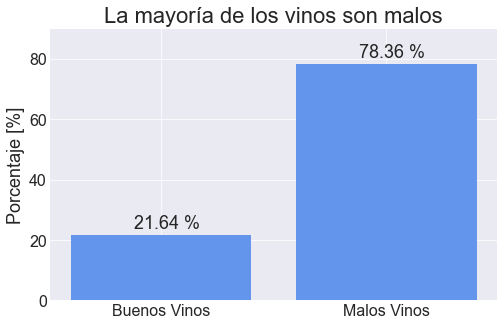

In [7]:
perc_bw = 100 - perc_gw
plt.figure(figsize=(8,5))
plt.bar(['Buenos Vinos', 'Malos Vinos'], [perc_gw, perc_bw], color = 'cornflowerblue')
plt.title('La mayoría de los vinos son malos', fontsize = 22)
plt.ylabel('Porcentaje [%]', fontsize = 18)
plt.ylim(0, 90)
plt.text(-0.12,24,'21.64 %', fontsize=18)
plt.text(0.88,80.5,'78.36 %', fontsize=18);

# Análisis Exploratorio Descriptivo

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_wine
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,0.216415
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,0.411842
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,0.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,0.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


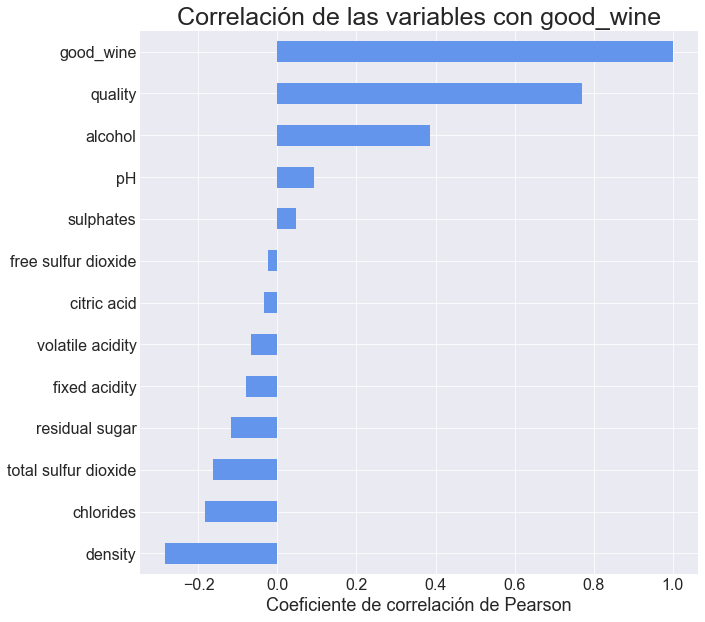

In [9]:
df.corrwith(df.good_wine).sort_values().plot.barh(figsize=(10,10), color='cornflowerblue')
plt.xlabel('Coeficiente de correlación de Pearson')
plt.title('Correlación de las variables con good_wine', fontsize = 25);

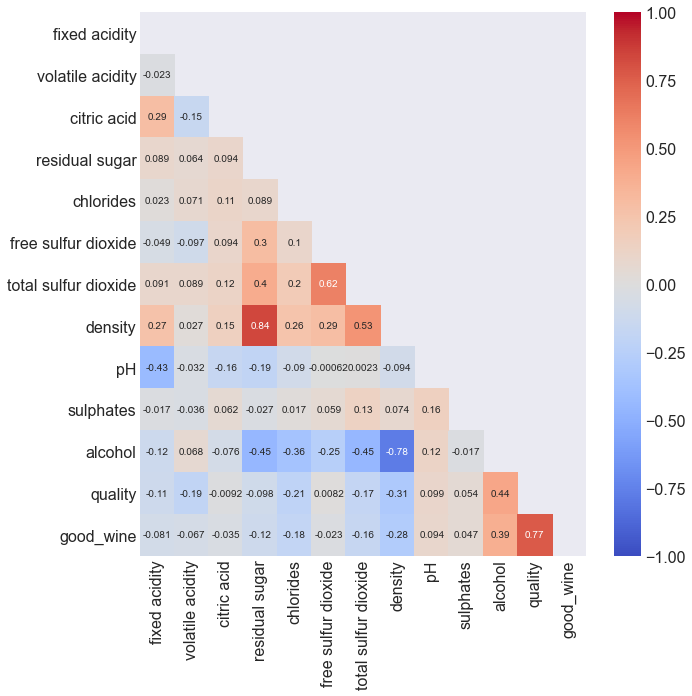

In [10]:
plt.figure(figsize=(10,10))
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True, annot_kws={'fontsize':10}, mask=mask, vmin=-1, vmax=1);

# Entrenamiento 

Comenzamos eligiendo las variables a partir de las cuales queremos entrenar a nuestro modelo. Es **MUY IMPORTANTE** nunca incluir la _variable objetivo_ en este conjunto. En este caso, la variable objetivo es _good_wine_ por lo que la excluimos.

In [11]:
x_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
           'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
           'pH', 'sulphates', 'alcohol']

Pregunta:

* ¿Cuando se deben estandarizar las variables? ¿Antes o después de partir los datos en entrenamiento y prueba?

La idea de partir los datos en entrenamiento y prueba es poder evaluar tu modelo entrenado con datos que tu modelo **NO HAYA VISTO NUNCA**. Si nosotros estandarizaramos las variables antes de partir los datos, estaríamos calculando el promedio sobre TODA nuestra base de datos, por lo tanto, el conjunto de entrenamiento que resultara de partir estos datos estandarizados tendría información sobre el conjunto de prueba (sería como ver preguntas del examen antes del examen) y entonces las métricas de evaluación estarán sobreestimando el performance del modelo. 

Esto último recibe el nombre de [Data Leakage](https://machinelearningmastery.com/data-leakage-machine-learning/).

<img src = "Imagenes\LR12.jpeg" width = 500>

Ahora sí, partamos el data set en entrenamiento y prueba y luego hagamos la estandarización de variables.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(df[x_names], df.good_wine, test_size=0.2, random_state=69)

In [13]:
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

Ajustando la regresión sobre nuestro conjunto de entrenamiento:

In [14]:
# Entrenamiento del modelo 
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [15]:
# Haciendo las predicciones
y_hat = model.predict(x_test)

# Y vemos las primeras 10 predicciones (sólo para comprobar que tenemos únicamentete valores de 0 y 1)
y_hat[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

También podemos calcular la probabilidad asociada a la predicción de cada registro:

In [16]:
y_hat_proba = model.predict_proba(x_test)
y_hat_proba[:10]

array([[0.68091932, 0.31908068],
       [0.68634842, 0.31365158],
       [0.92265503, 0.07734497],
       [0.9674025 , 0.0325975 ],
       [0.37254486, 0.62745514],
       [0.84067186, 0.15932814],
       [0.92317483, 0.07682517],
       [0.82681765, 0.17318235],
       [0.97676298, 0.02323702],
       [0.9212704 , 0.0787296 ]])

Y también podemos graficarla:

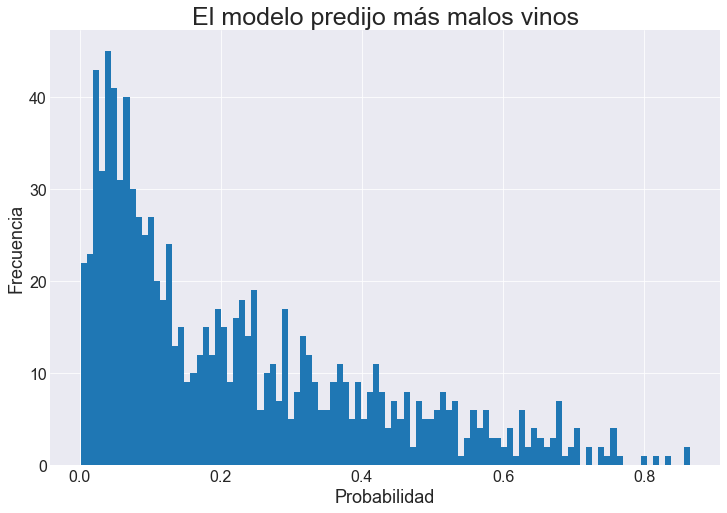

In [17]:
pd.DataFrame(y_hat_proba)[1].hist(bins=100, figsize = (12,8))
plt.title('El modelo predijo más malos vinos', fontsize = 25)
plt.xlabel('Probabilidad', fontsize = 18)
plt.ylabel('Frecuencia', fontsize = 18);

Recordando que los malos vinos estan clasificados como good_wine = 0 y los buenos vinos como good_wine = 1. 

Si nos fijamos en el histograma, vemos que presenta una _"carga"_ hacia el lado izquierdo, es decir, que la distribución de probabilidades presenta una tendencia hacia valores más cercanos al 0 que al 1. 

¿A qué se debe esto? Dos factores:

* El modelo tiene un buen rendimiento en la predicción de malos vinos, esto derivado de haberse entrenado con un dataset desbalanceado (el modelo aprendió más de los 0 que de los 1).
* Nuestro varaible objetivo del conjunto prueba claramente tiene más vinos malos que buenos, por lo que obviamente tendremos más predicciones de vinos malos que de buenos.

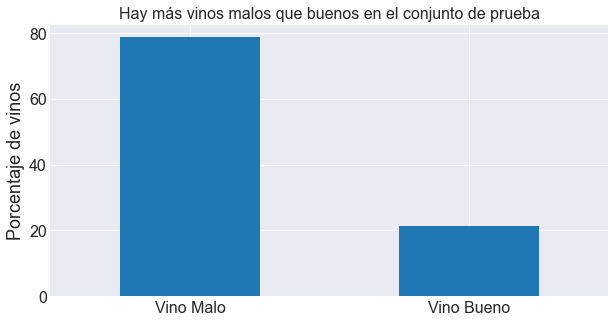

In [18]:
plt.figure(figsize = (10,5))
(y_test.value_counts(normalize = True) * 100).plot.bar(rot = 0)
plt.title('Hay más vinos malos que buenos en el conjunto de prueba', fontsize = 16)
plt.ylabel('Porcentaje de vinos')
plt.xticks([0, 1], ['Vino Malo', 'Vino Bueno']);

# Evaluación del Modelo

Un concepto importante para evaluar este tipo de modelos son los falsos postivos, los falsos negativos, los verdaderos positivos y los verdaderos negativos. Dichos conceptos se explican en el siguiente meme:

<center> 
<img src="Imagenes/confusion_matrix.png">
<center>  

Para evaluar un modelo es necesario tener una métrica adecuada según sea el tipo de problema al que nos enfrentamos. En el caso de un problema de clasificación tenemos las siguientes opciones:

 + [Precisión](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score): es la habilidad de no etiquetar como positivo a una muestra que en realidad sea negativa. Se obtiene a través de la relación:   
 
  $$ \frac{t_p}{t_p + f_p}$$  
 $t_p$ := número de verdaderos positivos  
 $f_p$ := número de falsos positivos  
 
 El mejor valor es 1; el peor valor es 0.
 
 + [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) (exhaustividad estadística): es la habilidad del clasificador de encontrar todas las muestras positivas. Matemáticamente podemos definir a la recall mediante la relación 
 
 $$ \frac{t_p}{t_p + f_n} $$  
 $t_p$ := número de verdaderos positivos
 
 $f_n$ := número de falsos negativos  
 
 El mejor valor es 1; el peor valor es 0.
 
 + [F1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score): Es un promedio ponderado por la precisión y sensibilidad. La F1_score se obtiene a partir de  
 
 $$ F1 = \frac{2  (precision * recall)}{(precision + recall)} $$  
 
 El mejor valor es 1; el peor valor es 0.
 
 + [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score): Calcula la exactitud del modelo a partir del número de predicciones correctas. Si todo el conjunto de valores predichos coincide estrictamente con el conjunto valores verdaderos, entonces la exactitud es 1, de lo contrario, es 0.  
 
 Sean:
 
 $\hat{y_i}$ := el valor predicho $i$  
 $y_i$ := el valores real correspondiente a $i$
 
Entonces, la cantidad de predicciones correctas sobre las $n$ muestras ($n_m$) se define como:  
 
 $$ accuracy (y,\hat{y}) = \frac{1}{(n_m)} \sum_{i=0}^{n_m-1} (\hat{y_i} = y_i) $$ 

 Para que quede mas claro la diferencia entre precisión y exactitud:     
 <center> 
<img src="Imagenes/exactitud-y-precision.jpg">
<center>  
    
 A mayor precisión se explica más la varianza de los datos y a mayor exactitud concuerdan más el valor estimado con respecto al real.   

 + [Area bajo la curva ROC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score): Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:
 
    * __Tasa de verdaderos positivos__. Es sinónimo de exhaustividad; se define como:
    
    $$TPR = \frac{t_p}{(t_p + f_n)}$$
    
    * __Tasa de falsos positivos__. Se define como:
  
    $$FPR = \frac{f_p}{(f_p + t_n)}$$
    
    $t_n$ := número de verdaderos negativos
    
 Una curva ROC representa TPR frente a FPR en diferentes umbrales de clasificación. Reducir el umbral de clasificación clasifica más elementos como positivos, por lo que aumentarán tanto los falsos positivos como los verdaderos positivos. En la siguiente figura, se muestra una curva ROC típica.
    
    <center> 
    <img src="Imagenes/ROC.png" width="500">
    <center> 
    
 Para calcular los puntos en una curva ROC, podríamos evaluar un modelo de regresión logística muchas veces con diferentes umbrales de clasificación. Una métrica de evaluación para clasificadores es el área bajo la curva ROC( Area Under the Curve [AUC]).

 El AUC mide toda el área bidimensional por debajo de la curva ROC completa (piensa en un cálculo integral) de (0,0) a (1,1).
 
 El AUC oscila en valor del 0 al 1. Un modelo cuyas predicciones son un 100% incorrectas tiene un AUC de 0; otro cuyas predicciones son un 100% correctas tiene un AUC de 1.

       
 + [Matriz de confusion](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix): Mide la exactitud del modelo. Para interpretar la [matriz de confusión](http://calidadcliente.blogspot.com/2018/03/matriz-de-confusion.html) tenemos la siguiente ilustración:
        
    <center> 
    <img src="Imagenes/mat_conf.jpg">
    <center> 
        
    + Verdaderos Positivos ($VP$): corresponden a aquellos eventos que realmente sucedieron y el sistema de predicción acertó.

    + Falsos Positivos ($FP$): son aquellos eventos que no sucedieron pero fueron clasificados como si hubiera sucedido.

    + Falsos Negativos ($FN$): son aquellos eventos que sí sucedieron pero que el sistema no los detectó.

    + Verdaderos Negativos ($VN$): aquellos eventos que no sucedieron y que el sistema los clasificó correctamente como tal.
        
   
 En resumen, los valores de la diagonal principal corresponden con los valores estimados de forma correcta por el modelo, tanto los verdaderos positivos $t_p$, como los verdaderos negativos $t_n$. La otra diagonal, por tanto, representa los casos en los que el modelo “se ha equivocado", es decir, los falsos negativos $f_n$ y los falsos positivos $f_p$.

Si queremos crear un informe en el cual se muestren las principales métricas de clasificación (las que acabamos de describir) podemos usar la función [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report):

In [19]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       770
           1       0.49      0.25      0.33       210

    accuracy                           0.78       980
   macro avg       0.65      0.59      0.60       980
weighted avg       0.75      0.78      0.75       980



Graficando nuestra matriz de confusión:

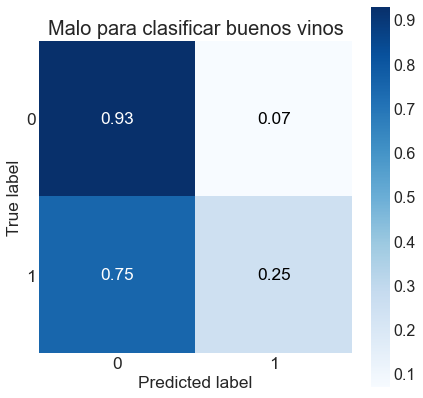

In [20]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = True, figsize=(7,7),text_fontsize='xx-large')
plt.title('Malo para clasificar buenos vinos', fontsize = 20);

Y evaluando nuestros resultados mediante _AUC_:

In [21]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat))

Área bajo la curva ROC:  0.590


Tenemos un modelo con un área bajo la curva baja. Nuestro modelo es un poco mejor que tirar una moneda al aire y decir "águila" o "sol" indistintamente.

# Mejoramiento del modelo

Existen diversas alternativas para mejorar el modelo. Una es utilizar otro modelo que explique mas la varianza de los datos, también podríamos limpiar la multicolinealidad de nuestro *dataset* y la otra es balancear los datos para evitar el sobreajuste de los datos sobre una clase.

Vamos a intentar esto último.

## Balanceo de clases
Un *dataset* desbalanceado se da cuando nuestra variable objetivo representa una pequeña fracción de todo el *dataset*, existen diversos métodos para atacar este problema como:
 
 + OverSample:
 <center> 
 <img src="Imagenes/oversample.png" width="500">
 <center> 
     
 + UnderSample:
 <center> 
 <img src="Imagenes/undersample.png" width="500">
 <center> 

## Basta de palabrería. ¡¡Hagamos un UNDERSAMPLE sobre nuestros datos!!

Comencemos viendo el número de buenos vinos (1) y malos vinos (0) que tenemos en nuestro conjunto de entrenamiento

In [22]:
y_train.value_counts()

0    3068
1     850
Name: good_wine, dtype: int64

Separamos ambos conjuntos en count_class_0 y count_class_1 para malos y buenos vinos respectivamente

In [23]:
count_class_0, count_class_1 = y_train.value_counts()

Filtramos los ceros (clase mayoritaría) y los unos (clase minoritaría)

In [24]:
# Clase mayoritaría
x_data_majority = x_train.loc[y_train == 0]
y_data_majority = y_train.loc[y_train == 0]

# Clase minoritaría
x_data_minority = x_train.loc[y_train == 1]
y_data_minority = y_train.loc[y_train == 1]

Ahora, hacemos un muestreo aleatorio de malos vinos (count_class_0) con un tamaño igual al del número de unos que tenemos, es decir, con el mismo número de registros que count_class_1.

In [25]:
y_df_major_downsampled = y_data_majority.sample(n = count_class_1, random_state=69)
x_df_major_downsampled = x_data_majority.loc[y_df_major_downsampled.index]

Por último concatenamos nuestro conjunto de ceros y unos (buenos y malos vinos)

In [26]:
y_data_downsampled = pd.concat([y_df_major_downsampled, y_data_minority])
x_data_downsampled = pd.concat([x_df_major_downsampled, x_data_minority])

Y tenemos que

In [27]:
print ('Tamaño final de nuestros conjuntos:\n\n', y_data_downsampled.value_counts(),'\n')

Tamaño final de nuestros conjuntos:

 1    850
0    850
Name: good_wine, dtype: int64 



## Volvemos a entrenar nuestro modelo pero ahora con nuestros datos balanceados

In [28]:
# Entrenamiento
model_under = LogisticRegression()
model_under.fit(x_data_downsampled, y_data_downsampled)

LogisticRegression()

In [29]:
# Predicción y probabilidad de la predicción
y_hat_under = model_under.predict(x_test)
y_hat_under_proba = model_under.predict_proba(x_test)

In [30]:
# Evaluación
print(classification_report(y_test,y_hat_under))

              precision    recall  f1-score   support

           0       0.90      0.68      0.78       770
           1       0.39      0.73      0.50       210

    accuracy                           0.69       980
   macro avg       0.64      0.71      0.64       980
weighted avg       0.79      0.69      0.72       980



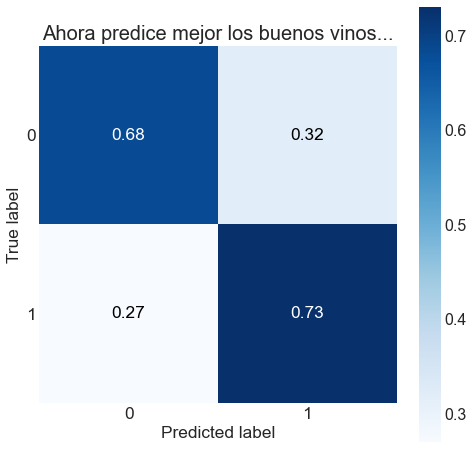

In [31]:
skplt.metrics.plot_confusion_matrix(y_test,y_hat_under, normalize=True, figsize=(8,8), text_fontsize='xx-large')
plt.title('Ahora predice mejor los buenos vinos...', fontsize = 20);

In [32]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_under))

Área bajo la curva ROC:  0.706


**¿Mejoró o no mejoró el modelo?**

Vamos a compararlos:

In [33]:
print('Dataset No-Balanceado')
print('---------------')
print(classification_report(y_test,y_hat))
print('---------------')
print('Dataset Balanceado por Undersample')
print('---------------')
print(classification_report(y_test,y_hat_under))

Dataset No-Balanceado
---------------
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       770
           1       0.49      0.25      0.33       210

    accuracy                           0.78       980
   macro avg       0.65      0.59      0.60       980
weighted avg       0.75      0.78      0.75       980

---------------
Dataset Balanceado por Undersample
---------------
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       770
           1       0.39      0.73      0.50       210

    accuracy                           0.69       980
   macro avg       0.64      0.71      0.64       980
weighted avg       0.79      0.69      0.72       980



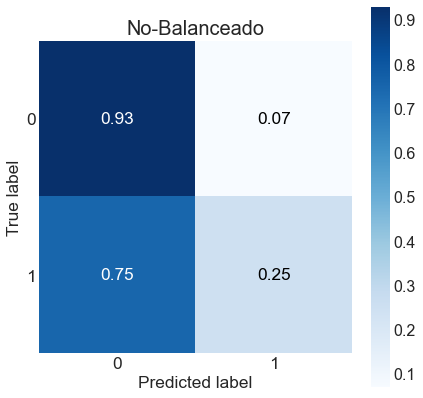

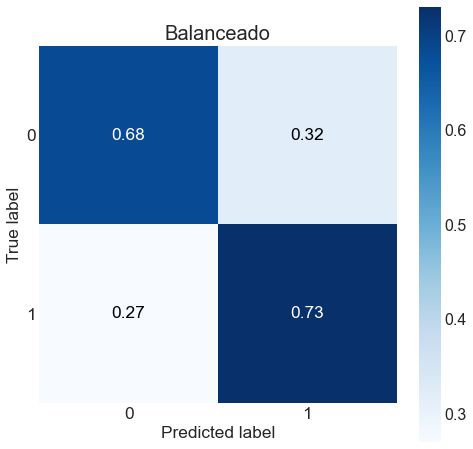

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = True, figsize=(7,7),text_fontsize='xx-large')
plt.title('No-Balanceado', fontsize = 20);

skplt.metrics.plot_confusion_matrix(y_test,y_hat_under, normalize=True, figsize=(8,8), text_fontsize='xx-large')
plt.title('Balanceado', fontsize = 20);

Aunque el modelo mejoró con el balanceo de los datos, la curva ROC aún es relativamente baja. Un modelo aceptablemente bueno presenta un área bajo la curva ROC superior a 0.75 - 0.80. Es un valor subjetivo que depende de quien evalúe el modelo.

Haciendo un analisís sobre las métricas que obtuvimos sobre los datos balanceados, podemos inferir que tenemos un modelo que no es del todo bueno, pero tampoco malo.

Dos métricas imprescindibles para la evauación del modelos son el _accuracy_ y el _área bajo la curva ROC_. Ambos valores oscilan en torno al 7. ¿Que tan buena o mala es una calificación de 7 sobre 10? ¿Es buena? ¿Es mala? Además, si observamos el comportamiento de nuestra matriz de confusión vemos que estamos acertando en la predicción del 67% de los valores verdderos positivos y en un 77% de verdaderos negativos.

¿Un 33% de falsos positivos podría hacer que perdamos nuestro empleo soñado como científico de datos? ¿Que hay del 23% de falsos negativos? La respuesta es... El modelo nos compra un par de días, pero si no lo mejoramos, ¡estamos fritos! ¿Por qué decimos esto? Por que es un modelo con una predicción "aceptable" de eventos verdaderos (verdaderos positivos y verdaderos negativos) sin embargo, un 33% de falsos positivos hará que nuestros "estandares de calidad" parezcan un chiste. Ese 33% se traduce en que **posiblemente 3 de cada 10 de los vinos que digamos que son "buenos", no lo sean**. Básicamente:

 <center> 
 <img src="Imagenes/meme.JPG" width="500">
 <center> 
     
A su vez, un 23% de falsos negativos se traduce en que de cada 10 vinos evaluados, estamos dejando escapar a 2 joyas en potencia, o sea, perdidas en ventas.

# Importancia de las variables

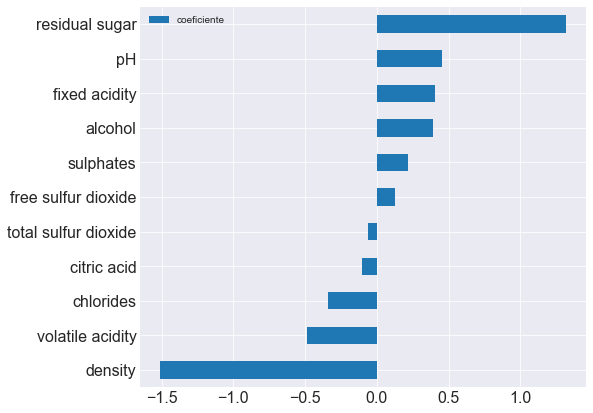

In [35]:
coef = model_under.coef_
coefs = pd.DataFrame(index = x_data_minority.columns, data =coef.T, columns=['coeficiente'])
coefs.sort_values('coeficiente').plot.barh(figsize=(8,7));

A menos que seamos unos expertos catadores, no tenemos ni idea de que son las variables. Sin embargo, podemos intuir un poco sobre ellas en base a la experiencia y/o sentido común para deducir si lo que nos dice el modelo concuerda con la realidad.

Al graficar la influencia que tiene cada una de las variables sobre nuestro modelo vemos que, según esto, la mayoría de los buenos vinos son agridulces pues tanto la variable _residual sugar_ como _fixed acidity_ presenta un aporte positivo considerable. Lo mismo ocurre con el grado alcohol que tenga el vino. Queremos un vino que "pegue" pero que no nos tire.
La densidad y la acidez volátil son las variables con el valor más negtivo de todos, es decir, que los buenos vinos no deben ser muy espesos ni provocarnos hacer muecas de acidez.

**¿Qué otras cosas podríamos deducir?**

# Ventajas y desventajas de una regresión logística

## Ventajas

* Es una técnica ampliamente utilizada porque **es muy eficiente**, no requiere demasiados recursos computacionales, es altamente interpretable, no requiere ningún ajuste, es fácil de normalizar y genera probabilidades predichas bien calibradas.

* Es increíblemente **fácil de implementar y muy eficiente de entrenar**.

* Debido a su simplicidad y al hecho de que se puede implementar relativamente fácil y rápido, la regresión logística también es una buena línea de base que se puede utilizar para medir el rendimiento de otros algoritmos más complejos.

## Desventajas

* La regresión logística NO es uno de los algoritmos más poderosos que hay y puede ser fácilmente superada por otros más complejos. 

* Dado que es susceptible a multicolinealidad, _La elección de las variables desempeña un papel importante en lo que respecta al rendimiento de la regresión logística_ y muchas veces es necesario el *feature engineering* (generación de variables) para eliminarla.


* Es un algoritmo que es conocido por su vulnerabilidad al sobreajuste. 

* A partir de una regresión logística es que no podemos resolver problemas **no lineales** a partir de ella. Esto debido a que su superficie de decisión es lineal. Basta con echar un vistazo al siguiente ejemplo que tiene 2 características binarias de 2 ejemplos. 
<center> 
<img src="Imagenes/des1.png" width="400">
<center>  

No podemos trazar una línea que separe estas 2 clases sin cometer errores, en tanto que los árboles de decisión, que revisaremos la próxima clase, sí son capaces de separar datos de esta naturaleza:
<center> 
<img src="Imagenes/des2.png" width="400">
<center>      

# Referencias



[1] [Logistic Regression: ML Glossary](https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html)

[2] [The Logistic Regression Algorithm](https://machinelearning-blog.com/2018/04/23/logistic-regression-101/#:~:text=Another%20disadvantage%20is%20its%20high,only%20predict%20a%20categorical%20outcome.)